In [1]:
import numpy as np
import os
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [2]:
dataset = pd.read_csv('./train/train.csv')
dataset

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2
...,...,...
6247,2881056.jpg,3
6248,1145083.jpg,2
6249,2898652.jpg,5
6250,2868175.jpg,3


In [3]:
dataset['category'].describe()

count    6252.000000
mean        2.657550
std         1.528998
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: category, dtype: float64

In [4]:
os.chdir('./train/images/')
os.getcwd()

'd:\\ADG Probation\\Ship classifier\\train\\images'

In [6]:
image_name = dataset['image']
image_name = np.array(image_name)

In [7]:
image_name

array(['2823080.jpg', '2870024.jpg', '2662125.jpg', ..., '2898652.jpg',
       '2868175.jpg', '2784171.jpg'], dtype=object)

In [8]:
label = dataset['category']
label = np.array(label)

In [9]:
label

array([1, 1, 2, ..., 5, 3, 1], dtype=int64)

In [10]:
list = []

for image in image_name:
    im = cv2.imread('./'+image , 1)
    im = cv2.resize(im ,(100,100))
    list.append(im)

list1 = np.array(list)

In [11]:
x_train , x_test , y_train , y_test = train_test_split(list1 ,label , test_size=0.1)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)


(5626, 100, 100, 3) (5626,)
(626, 100, 100, 3) (626,)


In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.18, random_state=1)
print(X_train.shape , Y_train.shape)
print(x_test.shape , y_test.shape)
print(X_val.shape , Y_val.shape )

(4613, 100, 100, 3) (4613,)
(626, 100, 100, 3) (626,)
(1013, 100, 100, 3) (1013,)


In [13]:
Y_train = to_categorical(Y_train)
print(Y_train.shape)
y_test = to_categorical(y_test)
print(y_test.shape)
Y_val = to_categorical(Y_val)
print(Y_val.shape)

(4613, 6)
(626, 6)
(1013, 6)


In [14]:
print(y_test[0])

[0. 1. 0. 0. 0. 0.]


In [16]:
X_train = X_train/255.0
x_test = x_test/255.0
X_val = X_val/255.0

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Dropout, Flatten, MaxPooling2D

In [18]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [19]:


IMG_SHAPE = (100, 100, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(6,activation='softmax')


model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 2,231,558
Non-trainable params: 34,112
_________________________________________________________________
None


In [21]:
#model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
hist = model.fit(X_train , Y_train , epochs=20 , validation_data=(X_val, Y_val), verbose = 1)

Epoch 1/20
145/145 [==============================] - 26s 114ms/step - loss: 1.7968 - accuracy: 0.3195 - val_loss: 3.0614 - val_accuracy: 0.1412
Epoch 2/20
145/145 [==============================] - 14s 100ms/step - loss: 1.1583 - accuracy: 0.5534 - val_loss: 2.0683 - val_accuracy: 0.3129
Epoch 3/20
145/145 [==============================] - 14s 99ms/step - loss: 0.8839 - accuracy: 0.6636 - val_loss: 1.3909 - val_accuracy: 0.4817
Epoch 4/20
145/145 [==============================] - 14s 99ms/step - loss: 0.7182 - accuracy: 0.7297 - val_loss: 1.0799 - val_accuracy: 0.5597
Epoch 5/20
145/145 [==============================] - 14s 99ms/step - loss: 0.6078 - accuracy: 0.7795 - val_loss: 0.9206 - val_accuracy: 0.6209
Epoch 6/20
145/145 [==============================] - 14s 99ms/step - loss: 0.5210 - accuracy: 0.8114 - val_loss: 0.8329 - val_accuracy: 0.6654
Epoch 7/20
145/145 [==============================] - 15s 101ms/step - loss: 0.4512 - accuracy: 0.8381 - val_loss: 0.7581 - val_accura

In [24]:
eval = model.evaluate(x_test, y_test, verbose = 1 )

20/20 [==============================] - 1s 48ms/step - loss: 0.5590 - accuracy: 0.8131


In [26]:
model.save("D:\ADG Probation\Ship classifier\mobilenetv2.hdf5")

In [27]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

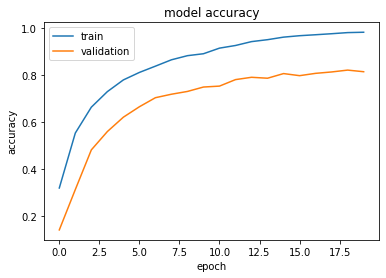

In [29]:
plot_hist(hist)

In [30]:
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

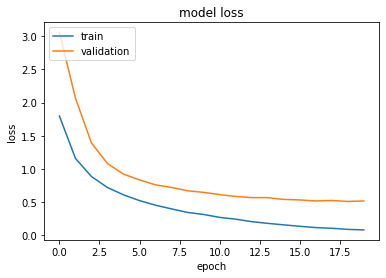

In [31]:
plot_hist(hist)